In [61]:
import bs4 as bs
import os
import pickle
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import datetime as dt
from matplotlib import style
import mplfinance as mpf
import matplotlib.dates as mdates
import pandas_datareader.data as web
import yfinance as yf
import seaborn as sns


style.use('ggplot')

In [23]:
def save_sp_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]: 
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open('sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers, f)
    return tickers

In [28]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = '2020-06-06'
    end = '2024-07-06'
    
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = yf.download(ticker, start=start, end=end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

In [30]:
get_data_from_yahoo()

Already have MMM

Already have AOS

Already have ABT

Already have ABBV

Already have ACN

Already have ADBE

Already have AMD

Already have AES

Already have AFL

Already have A

Already have APD

Already have ABNB

Already have AKAM

Already have ALB

Already have ARE

Already have ALGN

Already have ALLE

Already have LNT

Already have ALL

Already have GOOGL

Already have GOOG

Already have MO

Already have AMZN

Already have AMCR

Already have AEE

Already have AAL

Already have AEP

Already have AXP

Already have AIG

Already have AMT

Already have AWK

Already have AMP

Already have AME

Already have AMGN

Already have APH

Already have ADI

Already have ANSS

Already have AON

Already have APA

Already have AAPL

Already have AMAT

Already have APTV

Already have ACGL

Already have ADM

Already have ANET

Already have AJG

Already have AIZ

Already have T

Already have ATO

Already have ADSK

Already have ADP

Already have AZO

Already have AVB

Already have AVY

Already have A

In [34]:
def compile_data():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
     
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
        
        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('join_closes.csv')
    
compile_data()

/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

0
10
20
30
40
50
60


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

70
80
90
100
110
120
130


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

140
150
160
170
180
190


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

200
210
220
230
240
250


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

260
270
280
290
300


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

310
320
330


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

340
350
360
370
380


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

390
400
410
420


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

430
440
450
460


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

470
480
490


/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1727025019.py:12: FutureWarning: In a future version of pandas all arguments 

500
                 MMM\n      AOS\n      ABT\n     ABBV\n       ACN\n  \
Date                                                                  
2020-06-08  117.412148  47.386395  86.409790  79.871178  199.639221   
2020-06-09  117.292519  45.886940  84.271950  81.205315  195.916275   
2020-06-10  115.322433  45.067364  86.036362  81.821716  197.891113   
2020-06-11  107.216766  43.605160  81.947388  77.903748  185.153824   
2020-06-12  108.968742  43.726238  83.105003  78.072601  190.483109   

                ADBE\n      AMD\n      AES\n      AFL\n        A\n  ...  \
Date                                                                ...   
2020-06-08  397.779999  52.970001  13.264897  38.121025  87.778732  ...   
2020-06-09  397.160004  56.389999  12.263607  36.400593  87.273201  ...   
2020-06-10  406.820007  57.439999  11.669919  35.395504  87.312103  ...   
2020-06-11  387.670013  52.830002  10.810402  32.289688  82.665039  ...   
2020-06-12  406.540009  53.500000  11.226871  33

/var/folders/3s/nyk4h4b92hq9f4gbbbd_3d440000gr/T/ipykernel_20993/1370035790.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


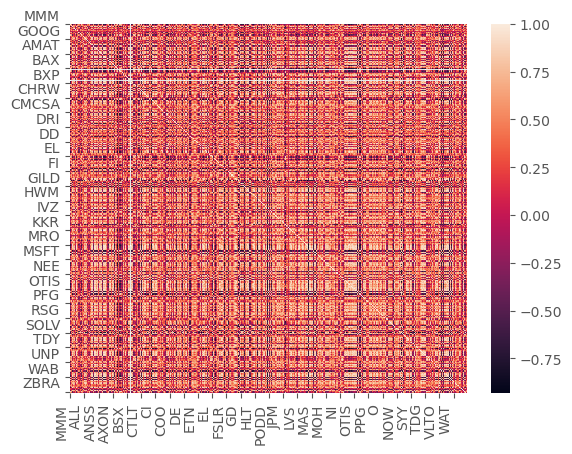

In [69]:
def visualize_data():
    df = pd.read_csv('join_closes.csv')
    
    df_corr = df.corr()  
    
    sns.heatmap(df_corr)
    
    
visualize_data()